Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the models

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter

Fetching the dataset

In [3]:
from google.colab import files
data = files.upload()

Saving final_data.csv to final_data.csv


In [4]:
data = pd.read_csv('final_data.csv')

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,label,text,label_num
0,0,605,ham,subject enron methanol meter 988291 follow not...,0
1,1,2349,ham,subject hpl nom january 9 2001 see attached fi...,0
2,2,3624,ham,subject neon retreat ho ho ho around wonderful...,0
3,3,4685,spam,subject photoshop window office cheap main tre...,1
4,4,2030,ham,subject indian spring deal book teco pvr reven...,0


In [6]:
data['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

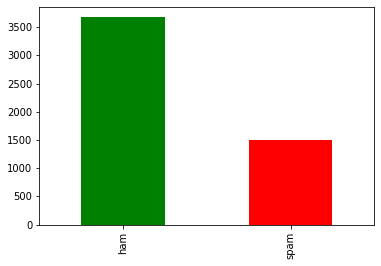

In [7]:
data['label'].value_counts().plot.bar(color = ["g","r"])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text']).toarray()

In [9]:
y = np.array(data['label_num'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Visualizing the data

In [12]:
import plotly.express as px
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
components = pca.fit_transform(X_train)

fig = px.scatter(components, x = 0, y = 1, color=y_train)
fig.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

In [14]:
y = np.array(data['label_num'])

In [15]:
y

array([0, 0, 0, ..., 0, 0, 1])

Instantiating models

In [16]:
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

Training the models without oversampling 

In [17]:
for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 24.95 sec
MultinomialNB        trained in 0.8 sec
Logistic Regr.       trained in 12.38 sec
KNN                  trained in 0.21 sec
SVM (Linear)         trained in 0.95 sec
SVM (RBF)            trained in 473.9 sec


In [18]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["perf"]])

Storing the results

In [19]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy without scaling (test set)', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy without scaling (test set)', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy without scaling (test set),Training time (sec)
0,SVM (Linear),0.989372,0.95
1,SVM (RBF),0.989372,473.90
2,Logistic Regr.,0.988406,12.38
3,Random Forest,0.981643,24.95
4,KNN,0.958454,0.21
5,MultinomialNB,0.914976,0.80


Visualizing the results

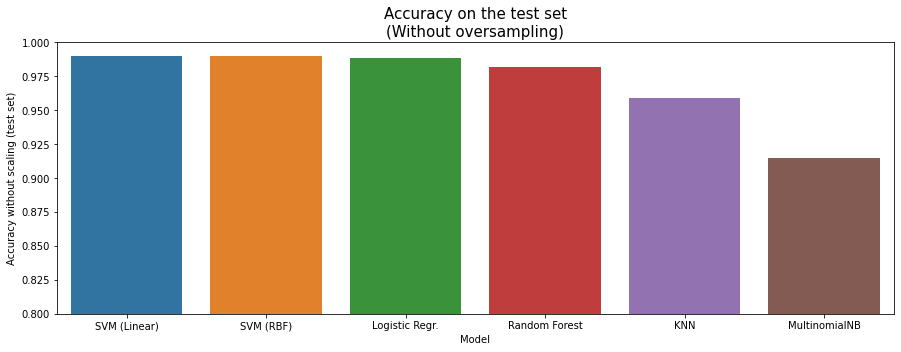

In [20]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy without scaling (test set)', data = df_acc)
plt.title('Accuracy on the test set\n(Without oversampling)', fontsize = 15)
plt.ylim(0.8,1)
plt.show()

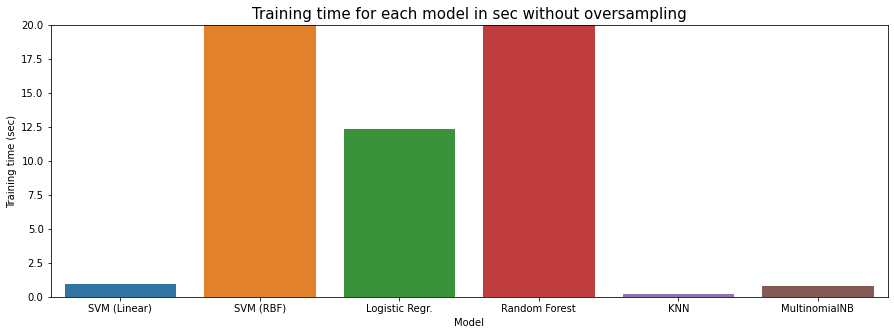

In [21]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec without oversampling', fontsize = 15)
plt.ylim(0,20)
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import fbeta_score, f1_score
from sklearn.metrics import roc_auc_score

In [33]:
model_stats = []
for name, model in models.items():
    
    y_pred = model["model"].predict(X_test)
    model_stats.append([name, model["model"].score(X_test, y_test),model["perf"],precision_score(y_test, y_pred), recall_score(y_test, y_pred),f1_score(y_test, y_pred),fbeta_score(y_test, y_pred, beta = 2), roc_auc_score(y_test, y_pred)])
    print(f'{name} appended to stats')        #only to track the progress

Random Forest appended to stats
MultinomialNB appended to stats
Logistic Regr. appended to stats
KNN appended to stats
SVM (Linear) appended to stats
SVM (RBF) appended to stats


In [34]:
df_stats = pd.DataFrame(model_stats)
df_stats.columns = ['Model', 'Accuracy without scaling (test set)', 'Training time (sec)', 'Precision', 'Recall','F1 score', 'F2 score', 'ROC-AUC score']
df_stats.sort_values(by = 'Accuracy without scaling (test set)', ascending = False, inplace=True)
df_stats.reset_index(drop = True, inplace=True)
df_stats

,Model,Accuracy without scaling (test set),Training time (sec),Precision,Recall,F1 score,F2 score,ROC-AUC score
0,SVM (Linear),0.989372,0.95,0.964968,1.000000,0.982172,0.992792,0.992486
1,SVM (RBF),0.989372,473.90,0.964968,1.000000,0.982172,0.992792,0.992486
2,Logistic Regr.,0.988406,12.38,0.967846,0.993399,0.980456,0.988181,0.989869
3,Random Forest,0.981643,24.95,0.955128,0.983498,0.969106,0.977690,0.982186
4,KNN,0.958454,0.21,0.985075,0.871287,0.924694,0.891892,0.932911
5,MultinomialNB,0.914976,0.80,1.000000,0.709571,0.830116,0.753329,0.854785


AttributeError: ignored